In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Tutoring Courses/DCOMP4702
%ls
%cd PracW3/
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Tutoring Courses/DCOMP4702
PracW2/  PracW3/  sml-book-draft-latest.pdf
/content/drive/My Drive/Tutoring Courses/DCOMP4702/PracW3
COMP4702-PW3.ipynb  PW3-DCOMP4702.gslides  w3regr.csv
PracW3_2023.pdf     w3classif.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

modelx= [-5.0, -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.5999999999999996, -3.5, -3.4, -3.3, -3.2, -3.0999999999999996, -3.0, -2.9, -2.8, -2.6999999999999997, -2.5999999999999996, -2.5, -2.4, -2.3, -2.1999999999999997, -2.0999999999999996, -2.0, -1.9, -1.7999999999999998, -1.6999999999999997, -1.5999999999999996, -1.5, -1.4, -1.2999999999999998, -1.1999999999999997, -1.0999999999999996, -1.0, -0.8999999999999995, -0.7999999999999998, -0.7000000000000002, -0.5999999999999996, -0.5, -0.39999999999999947, -0.2999999999999998, -0.1999999999999993, -0.09999999999999964, 0.0, 0.10000000000000053, 0.20000000000000018, 0.3000000000000007, 0.40000000000000036, 0.5, 0.6000000000000005, 0.7000000000000002, 0.8000000000000007, 0.9000000000000004, 1.0, 1.1000000000000005, 1.2000000000000002, 1.3000000000000007, 1.4000000000000004, 1.5, 1.6000000000000005, 1.7000000000000002, 1.8000000000000007, 1.9000000000000004, 2.0, 2.1000000000000005, 2.2, 2.30000000000000

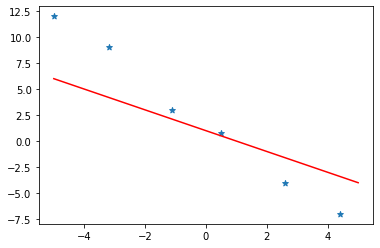

In [ ]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv
import numpy as np
x = np.array([-5, -3.2, -1.1, 0.5, 2.6, 4.4]).T 
r = np.array([12, 9, 3, 0.8, -4, -7]).T
modelx=[-5+i*0.1 for i in range(101)]
modely=-np.array(modelx)+1
print("modelx=",modelx)
print("modely=",modely)
plt.scatter(x,r,marker="*")
plt.plot(modelx,modely,color="red")
dummy_input=np.ones((6)).T
x2=np.array([[ii,jj] for ii,jj in zip(dummy_input,x)])
print(x2)
beta=np.matmul(x2.T,x2)
beta=inv(beta)
beta=np.matmul(beta,x2.T)
beta=np.matmul(beta,r)
print(beta)
trmodely=beta[0]+np.multiply(beta[1],modelx)

In [ ]:
ypred = beta[0] + np.multiply(beta[1],x)
ypred

array([12.01695568,  8.2955684 ,  3.9539499 ,  0.6460501 , -3.6955684 ,
       -7.41695568])

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.array(x).reshape(-1,1), np.array(r).reshape(-1,1))
reg= LinearRegression().fit
print(reg.coef_,reg.intercept_)
ypred = reg.predict(np.array(x).reshape(-1,1))
ypred

[[-2.06743738]] [1.67976879]


array([[12.01695568],
       [ 8.2955684 ],
       [ 3.9539499 ],
       [ 0.6460501 ],
       [-3.6955684 ],
       [-7.41695568]])

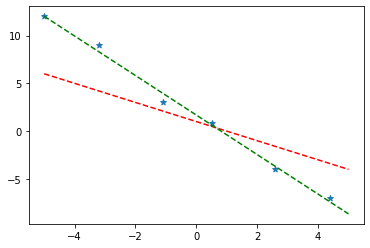

In [ ]:
plt.scatter(x,r,marker="*")
plt.plot(modelx,modely,color="red",linestyle="dashed")
plt.plot(modelx,trmodely,color="green",linestyle="dashed")

In [ ]:
reg_df = pd.read_csv("w3classif.csv", names=["X", "Y"])
reg_df.head()

,X,Y
0.475861,0.541139,0
1.412233,-1.540877,0
0.022608,-0.203143,0
-0.047869,-0.499965,0
1.701335,0.383024,0


In [ ]:
classif_df = pd.read_csv("w3regr.csv", names=["X", "Y"])
classif_df.head()

,X,Y
0,-5.0,123.867799
1,-4.9,63.138296
2,-4.8,4.163196
3,-4.7,-0.163918
4,-4.6,-33.727488


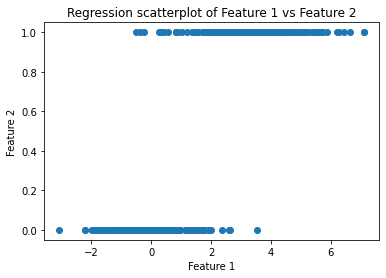

In [ ]:
plt.scatter(reg_df['X'], reg_df['Y'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Regression scatterplot of Feature 1 vs Feature 2')
plt.show()

In [ ]:
class_df = pd.read_csv("w3classif.csv", names=['X', 'Y', 'class'])
print(f"Num classes: {np.unique(class_df['class'])}")
class_df.head()

Num classes: [0 1]


,X,Y,class
0,0.475861,0.541139,0
1,1.412233,-1.540877,0
2,0.022608,-0.203143,0
3,-0.047869,-0.499965,0
4,1.701335,0.383024,0


Text(0.5, 1.0, 'classification scatter plot')

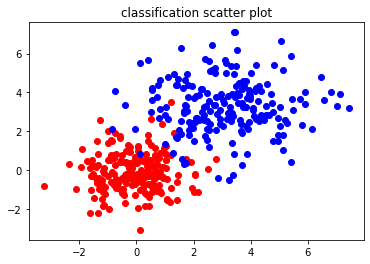

In [ ]:
class0_df = class_df[class_df['class']==0]
class1_df = class_df[class_df['class']==1]
plt.scatter(class0_df['X'], class0_df['Y'], c='red')
plt.scatter(class1_df['X'], class1_df['Y'], c='blue')
plt.title('classification scatter plot')

Q2

In [ ]:
reg_df = reg_df.sample(frac=1)
class_df = class_df.sample(frac=1)

In [ ]:
class_df.head()

In [ ]:
from sklearn.model_selection import train_test_split

reg_train_df, reg_test_df = train_test_split(reg_df, test_size=0.3, random_state=42,shuffle=True)
class_train_df, class_test_df = train_test_split(class_df, test_size=0.3, random_state=42)

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(reg_train_df[['X']], reg_train_df[['Y']])

train_preds = knn.predict(reg_train_df[['X']])
test_preds = knn.predict(reg_test_df[['X']])

train_mse = mean_squared_error(reg_train_df[['Y']], train_preds)
test_mse = mean_squared_error(reg_test_df[['Y']], test_preds)

print(train_mse, test_mse)

0.04761904761904763 0.060185185185185196


In [ ]:
print(f'shape reg: {reg_df.shape}, train shape: {reg_train_df.shape}, test shape: {reg_test_df.shape}')

Q3a

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(class_train_df[['X', 'Y']], class_train_df['class'])

# train_preds = knn.predict(class_train_df[['X', 'Y']])
# test_preds = knn.predict(class_test_df[['X', 'Y']])

# train_preds = knn.predict(class_train_df['X'])
test_preds = knn.predict(class_train_df['X'].values.reshape(1,1))
# train_acc = accuracy_score(class_train_df['class'], train_preds)
# test_acc = accuracy_score(class_test_df['class'], test_preds)

# train_loss = 1 - train_acc
# test_loss = 1 - test_acc

# print(f'train acc: {train_acc}, test acc: {test_acc}')
# print(f'train loss: {train_loss}, test_loss: {test_loss}')

ValueError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(class_train_df[['X', 'Y']], class_train_df['class'])

train_preds = knn.predict(class_train_df[['X', 'Y']])
test_preds = knn.predict(class_test_df[['X', 'Y']])

train_acc = accuracy_score(class_train_df['class'], train_preds)
test_acc = accuracy_score(class_test_df['class'], test_preds)

train_loss = 1 - train_acc
test_loss = 1 - test_acc

print(f'train acc: {train_acc}, test acc: {test_acc}')
print(f'train loss: {train_loss}, test_loss: {test_loss}')

ValueError: ignored

Q3b
you can replace the cmap='viridis' argument in the plt.contourf function with any other colormap that you prefer. Here is a list of some popular colormaps that you can use:

    'jet'
    'coolwarm'
    'magma'
    'inferno'
    'plasma'
    'cividis'
    'viridis'

In [ ]:
######################################
# IGNORE
import warnings
warnings.filterwarnings('ignore')
######################################

X = class_train_df[['X', 'Y']].to_numpy()
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')

plt.scatter(class0_df['X'], class0_df['Y'], c='red', cmap='coolwarm')
plt.scatter(class1_df['X'], class1_df['Y'], c='blue', cmap='coolwarm')
plt.title("Decision Region and Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

NameError: ignored

Q4a

Q4b

-5.0 3.0


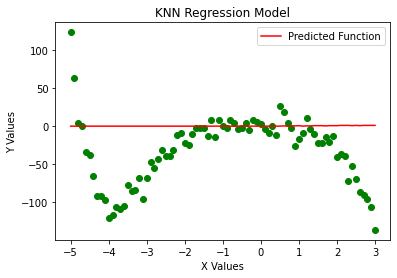

In [49]:
# plot for all data
reg_df = pd.read_csv("w3regr.csv", names=["X", "Y"])
reg_df.head()
plt.scatter(reg_df['X'], reg_df['Y'],c='green')
sample_len=len(reg_df["X"])
sample_min=np.amin(reg_df["X"])
sample_max=np.amax(reg_df["X"])
print(sample_min,sample_max)
X_new = np.linspace(sample_min, sample_max, num=sample_len).reshape(-1, 1)
# y_pred = knn.predict(reg_df["X"].values.reshape(-1,1))
plt.plot(reg_df["X"], y_pred, color='red', label='Predicted Function')
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("KNN Regression Model")
plt.legend()
plt.show()


Q5a

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_depth = 3
dt_reg = DecisionTreeClassifier(max_depth=max_depth)
dt_reg.fit(class_train_df[['X', 'Y']], class_train_df['class'])

y_train_pred = dt_reg.predict(class_train_df[['X', 'Y']])
y_test_pred = dt_reg.predict(class_test_df[['X', 'Y']])

train_acc = accuracy_score(class_train_df['class'], y_train_pred)
test_acc = accuracy_score(class_test_df['class'], y_test_pred)

train_loss = 1 - train_acc
test_loss = 1 - test_acc

print(f'train acc: {train_acc}, test acc: {test_acc}')
print(f'train loss: {train_loss}, test_loss: {test_loss}')

NameError: ignored

Q5b

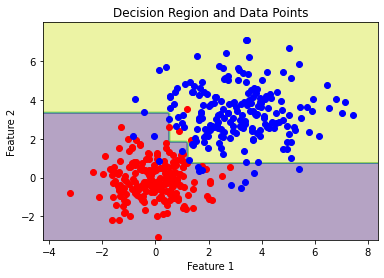

In [ ]:
######################################
# IGNORE
import warnings
warnings.filterwarnings('ignore')
######################################

X = class_train_df[['X', 'Y']].to_numpy()
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = dt_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

plt.scatter(class0_df['X'], class0_df['Y'], c='red', cmap='jet')
plt.scatter(class1_df['X'], class1_df['Y'], c='blue', cmap='jet')
plt.title("Decision Region and Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

6a

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dreg = DecisionTreeRegressor(max_depth=3)
dreg.fit(reg_train_df[['X']], reg_train_df[['Y']])

train_preds = dreg.predict(reg_train_df[['X']])
test_preds = dreg.predict(reg_test_df[['X']])

train_mse = mean_squared_error(reg_train_df[['Y']], train_preds)
test_mse = mean_squared_error(reg_test_df[['Y']], test_preds)

print(train_mse, test_mse)

340.58286264562815 609.9320847653955


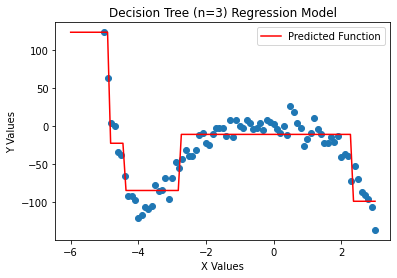

In [ ]:


# plot for all data
plt.scatter(reg_df['X'], reg_df['Y'])

X_new = np.linspace(-6, 3, num=100).reshape(-1, 1)
y_pred = dreg.predict(X_new)
plt.plot(X_new, y_pred, color='red', label='Predicted Function')
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Decision Tree (n=3) Regression Model")
plt.legend()
plt.show()